In [842]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Data

In [843]:
df = pd.read_csv('Data Set for Assignment 1.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [844]:
initial_data = Data.data_fix(df)
d1 = Data.dshuffle(initial_data)
train, test = Data.split(d1)
train = Data.Feature2(train)
test = Data.Feature2(test)

In [845]:
tclass = train['diagnosis'].tolist()
train = train.drop(columns = ['id', 'diagnosis'])
teclass = test['diagnosis'].tolist()
test = test.drop(columns = ['id', 'diagnosis'])
xbias = []
for i in range(len(train)):
    xbias.append(1)

train.insert(loc = 0, column = 'bias', value = xbias, allow_duplicates = False) #Adding a bias column at position 0 to our training data
ybias = []
for i in range(len(test)):
    ybias.append(1)

test.insert(loc = 0, column = 'bias', value = ybias, allow_duplicates = False)

In [846]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [847]:
sample = []

omega = list(np.ones(31)) #setting the initial value of omega vector to all zeroes

for i in range(1):
    if(omega[i] == 1):
        omega[i] = 0
        
for i in range(len(tclass)): #We assign B to 0 and M to 1
    if(tclass[i] == 'B'):
        sample.append(0)
    else:
        sample.append(1)

In [848]:
error = []

gradient = []

i = 0
for i in range(10):
    while i < len(train):
        x = list(train.iloc[i])
        error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
        gradient = [ j * (sigmoid(np.dot(omega,x)) - sample[i]) for j in x]
        gradient = [k * 0.01 for k in gradient]
        omega = list(np.subtract(omega,gradient))
        i = i + 1       

/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_65654/2009058083.py:9: RuntimeWarning: divide by zero encountered in log
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))
/var/folders/02/hhkpbp0n43l27g5_zyxytsxc0000gn/T/ipykernel_65654/2009058083.py:9: RuntimeWarning: invalid value encountered in double_scalars
  error.append(-1 * sample[i] * np.log(sigmoid(np.dot(omega,x))) - ((1 - sample[i]) * np.log(1 - sigmoid(np.dot(omega,x)))))


In [849]:
"""
for i in range(len(error)):
    if (np.isnan(error[i])):
        error[i] = 0
        """

'\nfor i in range(len(error)):\n    if (np.isnan(error[i])):\n        error[i] = 0\n        '

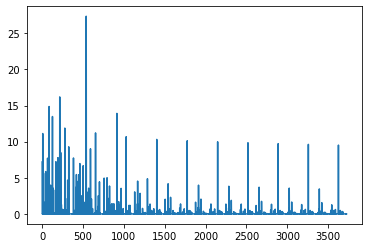

In [850]:
plt.plot(error)
plt.show()

In [851]:
error

[7.1923006826941425,
 0.044148811676319136,
 0.00022369616874248703,
 6.154821097415613e-11,
 0.0499784911486273,
 3.123168390577905e-12,
 5.423848817284753e-08,
 11.123261692020058,
 1.788791337277652e-12,
 6.23515569740628e-08,
 2.835276965704967e-06,
 0.0004614829465222896,
 2.719406570267251e-08,
 5.406408784401267e-07,
 0.00011078653535115377,
 1.3265185941331953e-07,
 1.4462516467847042,
 1.5877156937547755e-08,
 5.930507446507989e-06,
 3.6964195375133655e-07,
 0.029075000099997483,
 1.6451701453468281,
 5.4058979515194244e-12,
 4.33955178025767e-07,
 0.11321298135957251,
 7.29509177148808e-07,
 0.00015646388923520334,
 0.013925799163611842,
 0.39680262570122843,
 1.3187345707880553e-07,
 3.1907809727777906e-12,
 1.5886691963214626e-10,
 nan,
 1.3101075788368607e-09,
 0.3469147215012201,
 4.2077452633302283e-13,
 1.0803130865608194e-05,
 1.149095430990303e-06,
 5.61946279977924e-09,
 0.013346599683928479,
 0.0002588847767835852,
 5.629280186127718,
 0.21298124215917566,
 5.857082

In [852]:
x = list(train.iloc[7])
(-1 * sample[7] * np.log(sigmoid(np.dot(omega,x)))) - ((1 - sample[7]) * np.log(1 - sigmoid(np.dot(omega,x))))

0.8814700903797374

In [853]:
prediction = []
for i in range(len(test)):
    big = np.float128(np.dot(omega,test.iloc[i]))
    """
    if(big > 1000):
        prediction.append('B')
    elif(big < -1000):
        prediction.append('M')
        """
    if(sigmoid(big) > 0.6):
        prediction.append('M')
    else:
        prediction.append('B')

accuracy = 0
for i in range(len(teclass)):
    if(prediction[i] == teclass[i]):
        accuracy = accuracy + 1

correct = accuracy / len(teclass)
print(correct)

0.967741935483871
